# Importing Data

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('data/modified.csv')

# Exploring the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   F1                      1016 non-null   int64  
 1   name                    1016 non-null   object 
 2   role                    1016 non-null   object 
 3   club                    1016 non-null   object 
 4   games-started           1016 non-null   int64  
 5   minutes-played          1016 non-null   int64  
 6   clean-sheets            1016 non-null   int64  
 7   goals-conceded          1016 non-null   int64  
 8   defensive-contribution  1016 non-null   int64  
 9   bonus                   1016 non-null   int64  
 10  ict-index               1016 non-null   float64
 11  saves                   1016 non-null   int64  
 12  assists                 1016 non-null   int64  
 13  penalties-saved         1016 non-null   int64  
 14  points                  1016 non-null   

In [ ]:
df.describe()

,F1,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price,season_year
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,554.201772,17.586614,1566.087598,4.763780,24.723425,44.586614,5.444882,86.008268,5.372047,2.196850,0.031496,68.048228,0.086614,0.081693,2.437992,5.418307,2024.119094
std,342.420954,12.220083,1045.120252,4.096774,17.114545,84.576129,6.845869,73.443388,21.939895,2.939895,0.210540,50.762566,0.298400,0.311076,4.044103,1.254438,0.805516
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2023.000000
25%,266.750000,6.000000,612.250000,1.000000,10.000000,0.000000,0.000000,29.350000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,4.500000,2023.000000
50%,535.500000,18.000000,1586.500000,4.000000,24.000000,0.000000,3.000000,72.200000,0.000000,1.000000,0.000000,60.000000,0.000000,0.000000,1.000000,5.000000,2024.000000
75%,809.250000,28.000000,2485.000000,8.000000,38.000000,53.250000,8.000000,122.475000,0.000000,3.000000,0.000000,103.250000,0.000000,0.000000,3.000000,6.000000,2025.000000
max,1353.000000,38.000000,3420.000000,19.000000,79.000000,455.000000,55.000000,476.000000,154.000000,18.000000,2.000000,344.000000,2.000000,3.000000,36.000000,14.500000,2025.000000


# Preprocessing

In [ ]:
df.drop(columns='F1', inplace=True)

In [ ]:
df['season_year'] = df['season_year'].astype('str')

In [ ]:
# remove seasons of a player with less than 90 minutes on the field
lowest_minutes = df.loc[df['minutes-played'] < 90].index
for i in lowest_minutes:
    df.drop(index=i, inplace=True)

In [ ]:
df.describe()

,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,19.100535,1699.637433,5.176471,26.810695,48.322995,5.916578,93.330588,5.837433,2.386096,0.034225,73.737968,0.094118,0.088770,2.647059,5.487166
std,11.553921,981.322735,4.012545,16.233161,87.163402,6.938047,72.028771,22.811942,2.990280,0.219267,48.922838,0.309931,0.323313,4.149963,1.276264
min,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,9.000000,839.500000,2.000000,13.000000,0.000000,1.000000,39.250000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,4.500000
50%,19.000000,1712.000000,5.000000,26.000000,0.000000,4.000000,77.400000,0.000000,1.000000,0.000000,66.000000,0.000000,0.000000,1.000000,5.000000
75%,29.000000,2554.500000,8.000000,38.000000,70.500000,9.000000,127.300000,0.000000,3.000000,0.000000,107.000000,0.000000,0.000000,3.000000,6.000000
max,38.000000,3420.000000,19.000000,79.000000,455.000000,55.000000,476.000000,154.000000,18.000000,2.000000,344.000000,2.000000,3.000000,36.000000,14.500000


In [ ]:
# remove seasons of a player with no matches played
lowest_games = df.loc[df['games-started'] < 1].index
for i in lowest_games:
    df.drop(index=i, inplace=True)

In [ ]:
# remove seasons of a player with less than 10 points
lowest_points = df.loc[df.points < 10].index
for i in lowest_points:
    df.drop(index=i, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 1012
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    879 non-null    object 
 1   role                    879 non-null    object 
 2   club                    879 non-null    object 
 3   games-started           879 non-null    int64  
 4   minutes-played          879 non-null    int64  
 5   clean-sheets            879 non-null    int64  
 6   goals-conceded          879 non-null    int64  
 7   defensive-contribution  879 non-null    int64  
 8   bonus                   879 non-null    int64  
 9   ict-index               879 non-null    float64
 10  saves                   879 non-null    int64  
 11  assists                 879 non-null    int64  
 12  penalties-saved         879 non-null    int64  
 13  points                  879 non-null    int64  
 14  red-cards               879 non-null    int64 

# Feature Engineering

### Assigning weights to related features

In [ ]:
df.head()

,name,role,club,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price,season_year
0,Mohamed Salah,Midfielder,Liverpool,38,3374,15,40,136,55,476.0,0,18,0,344,0,0,29,14.5,2025
1,Mohamed Salah,Midfielder,Liverpool,28,2531,8,30,0,24,346.0,0,12,0,211,0,0,18,14.5,2024
2,Mohamed Salah,Midfielder,Liverpool,37,3290,13,45,0,23,365.6,0,13,0,239,0,0,19,14.5,2023
3,Bryan Mbeumo,Midfielder,Man Utd,38,3415,9,55,273,29,340.8,0,9,0,236,0,0,20,8.0,2025
4,Bryan Mbeumo,Midfielder,Man Utd,22,1957,5,31,0,12,170.1,0,7,0,127,0,0,9,8.0,2024


In [ ]:
weights = {
    'clean_sheets': 4,
    'goals-conceded': -2,
    'bonus': 3,
    'own-goals': -5,
    'red-cards': -5,
    'minutes-played': 0.01,
    'penalties-saved': 6,
    'points': 0.1,
    'defensive-contribution': 0.1,
    'ict': 0.01
}

### Adding a 'Performance' label that represents a simple overall quality of the player

In [1]:
import numpy as np
df['Performance'] = np.round(df['goals-scored'] + df['assists'] + weights['bonus'] * df['bonus'] + weights['goals-conceded'] * df['goals-conceded'] + weights['clean_sheets'] * df['clean-sheets'] + weights['own-goals'] * df['own-goals'] + weights['red-cards'] * df['red-cards'] + df['saves'] + weights['minutes-played'] * df['minutes-played'] + weights['defensive-contribution'] * df['defensive-contribution'] + weights['penalties-saved'] * df['penalties-saved'] + weights['points'] * df['points'] + weights['ict'] * df['ict-index'])

NameError: name 'df' is not defined

In [ ]:
df.head()

,name,role,club,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price,season_year,Performance
0,Mohamed Salah,Midfielder,Liverpool,38,3374,15,40,136,55,476.0,0,18,0,344,0,0,29,14.5,2025,278.0
1,Mohamed Salah,Midfielder,Liverpool,28,2531,8,30,0,24,346.0,0,12,0,211,0,0,18,14.5,2024,124.0
2,Mohamed Salah,Midfielder,Liverpool,37,3290,13,45,0,23,365.6,0,13,0,239,0,0,19,14.5,2023,123.0
3,Bryan Mbeumo,Midfielder,Man Utd,38,3415,9,55,273,29,340.8,0,9,0,236,0,0,20,8.0,2025,130.0
4,Bryan Mbeumo,Midfielder,Man Utd,22,1957,5,31,0,12,170.1,0,7,0,127,0,0,9,8.0,2024,44.0


In [2]:
df = pd.read_csv('data/final.csv').drop(columns='Unnamed: 0')
df.head()

,name,role,club,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price,season_year,Performance
0,Mohamed Salah,Midfielder,Liverpool,38,3374,15,40,136,55,476.0,0,18,0,344,0,0,29,14.5,2025,278.0
1,Mohamed Salah,Midfielder,Liverpool,28,2531,8,30,0,24,346.0,0,12,0,211,0,0,18,14.5,2024,124.0
2,Mohamed Salah,Midfielder,Liverpool,37,3290,13,45,0,23,365.6,0,13,0,239,0,0,19,14.5,2023,123.0
3,Bryan Mbeumo,Midfielder,Man Utd,38,3415,9,55,273,29,340.8,0,9,0,236,0,0,20,8.0,2025,130.0
4,Bryan Mbeumo,Midfielder,Man Utd,22,1957,5,31,0,12,170.1,0,7,0,127,0,0,9,8.0,2024,44.0


### Season trends

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
corrs = df[['Performance', 'minutes-played', 'games-started', 'points', 'current-price', 'season_year', 'bonus']].corr()

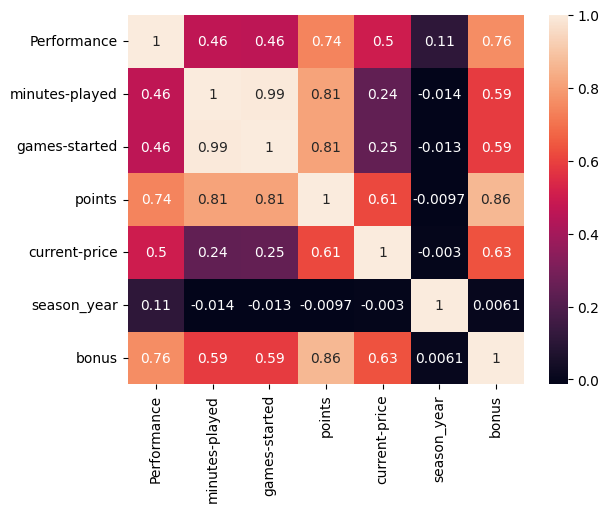

In [5]:
sns.heatmap(corrs, annot=True)
plt.show()

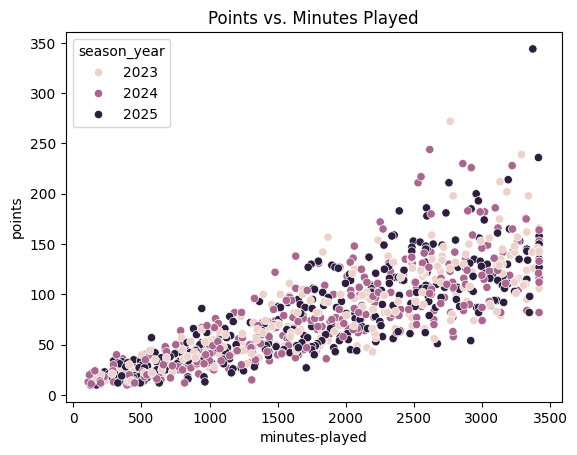

In [6]:
sns.scatterplot(df, x='minutes-played', y='points', hue='season_year')
plt.title('Points vs. Minutes Played')
plt.show()

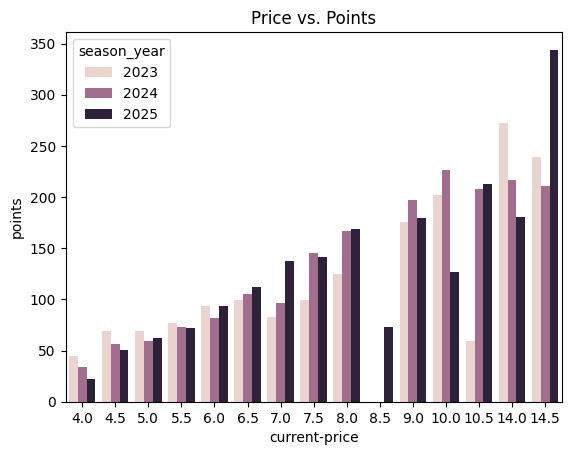

In [ ]:
sns.barplot(df, x='current-price', y='points', hue='season_year', errorbar=None)
plt.title('Price vs. Points')
plt.show()

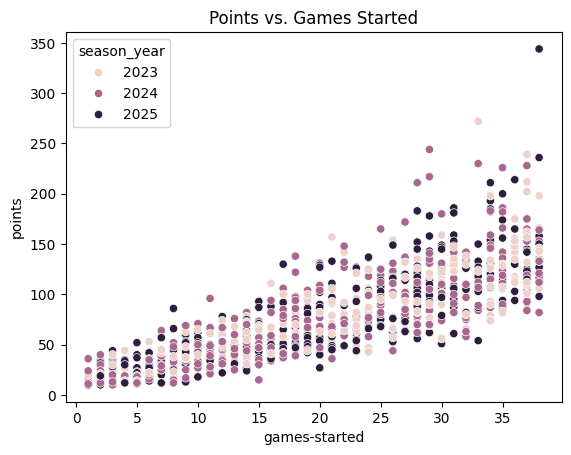

In [8]:
sns.scatterplot(df, x='games-started', y='points', hue='season_year')
plt.title('Points vs. Games Started')
plt.show()

In [9]:
season = 2025
top_scorers = df[df.season_year == season].sort_values('goals-scored', ascending=False).head(10)
top_scorers

,name,role,club,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price,season_year,Performance
0,Mohamed Salah,Midfielder,Liverpool,38,3374,15,40,136,55,476.0,0,18,0,344,0,0,29,14.5,2025,278.0
9,Alexander Isak,Forward,Newcastle,34,2758,12,41,89,36,292.7,0,6,0,211,0,0,23,10.5,2025,164.0
27,Erling Haaland,Forward,Man City,31,2736,10,38,73,26,281.8,0,3,0,181,0,0,22,14.0,2025,123.0
3,Bryan Mbeumo,Midfielder,Man Utd,38,3415,9,55,273,29,340.8,0,9,0,236,0,0,20,8.0,2025,130.0
12,Chris Wood,Forward,Nott'm Forest,35,2958,15,37,96,41,205.6,0,3,0,200,0,0,20,7.5,2025,193.0
21,Yoane Wissa,Forward,Brentford,34,2921,9,45,138,32,242.4,0,6,0,185,0,0,18,7.5,2025,130.0
18,Ollie Watkins,Forward,Aston Villa,31,2593,10,40,78,32,223.8,0,8,0,186,0,0,16,9.0,2025,135.0
30,Matheus Santos Carneiro da Cunha,Midfielder,Man Utd,29,2596,7,54,200,41,272.2,0,7,0,178,0,0,15,8.0,2025,131.0
6,Cole Palmer,Midfielder,Chelsea,36,3193,10,41,171,35,338.0,0,10,0,214,0,0,15,10.5,2025,162.0
63,Jean-Philippe Mateta,Forward,Crystal Palace,33,2642,9,37,114,27,187.3,0,2,0,150,0,0,14,7.5,2025,114.0


In [10]:
top_10scorers = df.groupby('name')['goals-scored'].mean().sort_values(ascending=False).reset_index().head(10)
top_10scorers

,name,goals-scored
0,Erling Haaland,28.333333
1,Mohamed Salah,22.000000
2,Alexander Isak,18.000000
3,Ollie Watkins,16.666667
4,Jørgen Strand Larsen,14.000000
5,Bryan Mbeumo,12.666667
6,Phil Foden,12.333333
7,Chris Wood,12.333333
8,Cole Palmer,12.333333
9,Yoane Wissa,12.333333


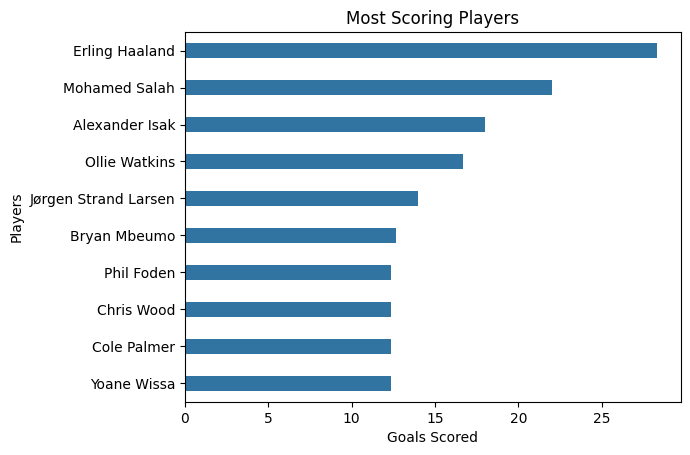

In [11]:
sns.barplot(top_10scorers, x=top_10scorers['goals-scored'], y=top_10scorers.name, errorbar=None, gap=1.5)
plt.xlabel('Goals Scored')
plt.ylabel('Players')
plt.title(f'Most Scoring Players')
plt.show()

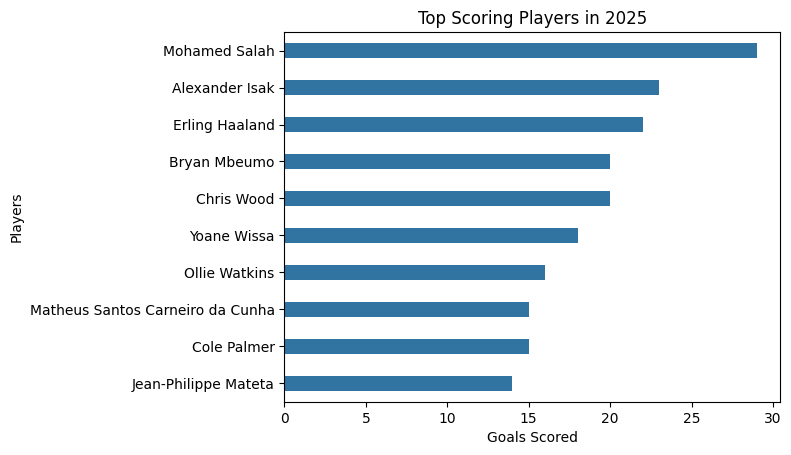

In [12]:
sns.barplot(top_scorers, x=top_scorers['goals-scored'], y=top_scorers.name, errorbar=None, gap=1.5)
plt.xlabel('Goals Scored')
plt.ylabel('Players')
plt.title(f'Top Scoring Players in {season}')
plt.show()

In [13]:
top_defenders = df[(df.role == 'Defender') & (df.season_year == season)].sort_values('Performance', ascending=False).head(10)
top_defenders

,name,role,club,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price,season_year,Performance
123,Murillo Costa dos Santos,Defender,Nott'm Forest,36,3188,12,44,376,18,134.0,0,0,0,130,0,0,2,5.5,2025,100.0
117,William Saliba,Defender,Arsenal,35,3039,12,29,216,14,94.2,0,0,0,130,1,0,2,6.0,2025,95.0
55,Joško Gvardiol,Defender,Man City,36,3278,13,41,233,15,185.0,0,0,0,153,0,0,5,6.0,2025,93.0
83,Virgil van Dijk,Defender,Liverpool,37,3330,14,38,300,8,143.7,0,1,0,143,0,0,3,6.0,2025,87.0
128,Ola Aina,Defender,Nott'm Forest,35,2996,12,39,206,15,94.1,0,1,0,128,0,0,2,5.0,2025,82.0
205,Jurriën Timber,Defender,Arsenal,27,2415,11,21,125,9,94.2,0,3,0,114,0,0,1,5.5,2025,82.0
187,Gabriel dos Santos Magalhães,Defender,Arsenal,28,2363,10,22,159,9,108.2,0,2,0,117,0,0,3,6.0,2025,80.0
231,Neco Williams,Defender,Nott'm Forest,28,2588,10,31,251,8,118.0,0,3,0,109,0,0,1,5.0,2025,69.0
107,Marc Cucurella Saseta,Defender,Chelsea,33,2988,9,38,191,14,137.9,0,2,0,133,1,0,5,6.0,2025,68.0
259,James Tarkowski,Defender,Everton,33,2922,10,38,356,8,126.9,0,1,0,105,0,0,1,5.5,2025,67.0


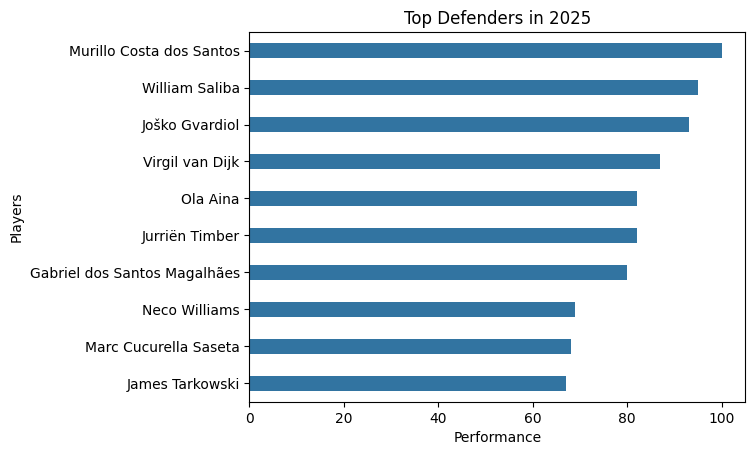

In [14]:
sns.barplot(top_defenders, y=top_defenders.name, x=top_defenders.Performance, errorbar=None, gap=1.5)
plt.xlabel('Performance')
plt.ylabel('Players')
plt.title(f'Top Defenders in {season}')
plt.show()

In [15]:
top_goalies = df[(df.role == 'Goalkeeper') & (df.season_year == season)].sort_values('Performance', ascending=False).head(10)
top_goalies

,name,role,club,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price,season_year,Performance
46,Jordan Pickford,Goalkeeper,Everton,38,3420,12,44,0,15,107.0,122,1,2,158,0,0,0,5.5,2025,191.0
66,Matz Sels,Goalkeeper,Nott'm Forest,38,3420,13,46,0,11,96.7,120,1,0,150,0,0,0,5.0,2025,164.0
88,David Raya Martín,Goalkeeper,Arsenal,38,3420,13,34,0,10,76.7,86,0,0,142,0,0,0,5.5,2025,149.0
142,Robert Lynch Sánchez,Goalkeeper,Chelsea,32,2880,10,34,0,11,77.5,95,0,1,126,0,0,0,5.0,2025,148.0
99,Dean Henderson,Goalkeeper,Crystal Palace,38,3420,11,51,0,8,88.6,104,0,1,135,0,0,0,5.0,2025,125.0
210,Alisson Becker,Goalkeeper,Liverpool,28,2508,10,29,0,9,64.0,78,0,0,112,0,0,0,5.5,2025,124.0
179,André Onana,Goalkeeper,Man Utd,34,3060,9,44,0,8,74.7,90,0,1,120,0,0,0,5.0,2025,111.0
243,Kepa Arrizabalaga Revuelta,Goalkeeper,Arsenal,31,2790,8,39,0,7,75.8,97,0,0,106,0,0,0,4.5,2025,111.0
219,Ederson Santana de Moraes,Goalkeeper,Man City,26,2320,10,26,0,9,60.9,54,4,0,111,0,0,0,5.5,2025,108.0
213,Emiliano Martínez Romero,Goalkeeper,Aston Villa,37,3195,8,47,0,6,86.0,100,0,1,111,1,0,0,5.0,2025,101.0


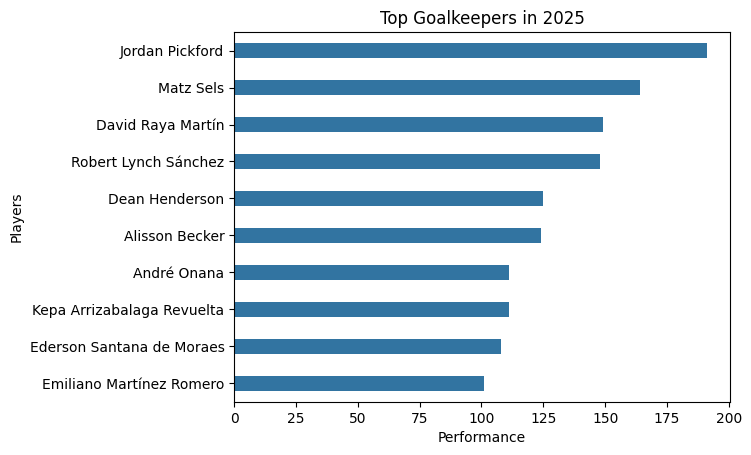

In [16]:
sns.barplot(top_goalies, y=top_goalies.name, x=top_goalies.Performance, errorbar=None, gap=1.5)
plt.xlabel('Performance')
plt.ylabel('Players')
plt.title(f'Top Goalkeepers in {season}')
plt.show()

In [17]:
top_cleansheets = df[(df.role.isin(['Defender', 'Goalkeeper'])) & (df.season_year == season)].sort_values('clean-sheets', ascending=False).head(10)
top_cleansheets

,name,role,club,games-started,minutes-played,clean-sheets,goals-conceded,defensive-contribution,bonus,ict-index,saves,assists,penalties-saved,points,red-cards,own-goals,goals-scored,current-price,season_year,Performance
83,Virgil van Dijk,Defender,Liverpool,37,3330,14,38,300,8,143.7,0,1,0,143,0,0,3,6.0,2025,87.0
55,Joško Gvardiol,Defender,Man City,36,3278,13,41,233,15,185.0,0,0,0,153,0,0,5,6.0,2025,93.0
81,Nikola Milenković,Defender,Nott'm Forest,37,3330,13,45,310,2,127.2,0,2,0,145,0,0,5,5.5,2025,55.0
66,Matz Sels,Goalkeeper,Nott'm Forest,38,3420,13,46,0,11,96.7,120,1,0,150,0,0,0,5.0,2025,164.0
88,David Raya Martín,Goalkeeper,Arsenal,38,3420,13,34,0,10,76.7,86,0,0,142,0,0,0,5.5,2025,149.0
202,Dan Burn,Defender,Newcastle,37,3330,13,45,286,9,115.8,0,1,0,115,0,2,1,5.0,2025,56.0
123,Murillo Costa dos Santos,Defender,Nott'm Forest,36,3188,12,44,376,18,134.0,0,0,0,130,0,0,2,5.5,2025,100.0
128,Ola Aina,Defender,Nott'm Forest,35,2996,12,39,206,15,94.1,0,1,0,128,0,0,2,5.0,2025,82.0
117,William Saliba,Defender,Arsenal,35,3039,12,29,216,14,94.2,0,0,0,130,1,0,2,6.0,2025,95.0
46,Jordan Pickford,Goalkeeper,Everton,38,3420,12,44,0,15,107.0,122,1,2,158,0,0,0,5.5,2025,191.0


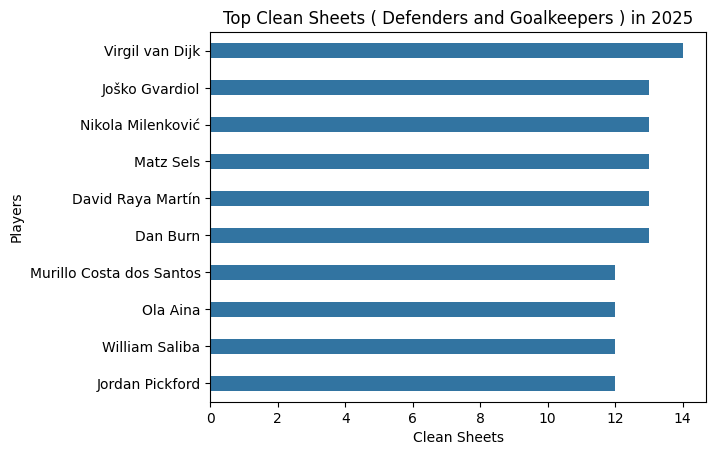

In [18]:
sns.barplot(top_cleansheets, y=top_cleansheets.name, x=top_cleansheets['clean-sheets'], errorbar=None, gap=1.5)
plt.xlabel('Clean Sheets')
plt.ylabel('Players')
plt.title(f'Top Clean Sheets ( Defenders and Goalkeepers ) in {season}')
plt.show()